In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp2d

In [3]:
from qutip import *

8
[  0.          14.28571429  28.57142857  42.85714286  57.14285714
  71.42857143  85.71428571 100.        ]


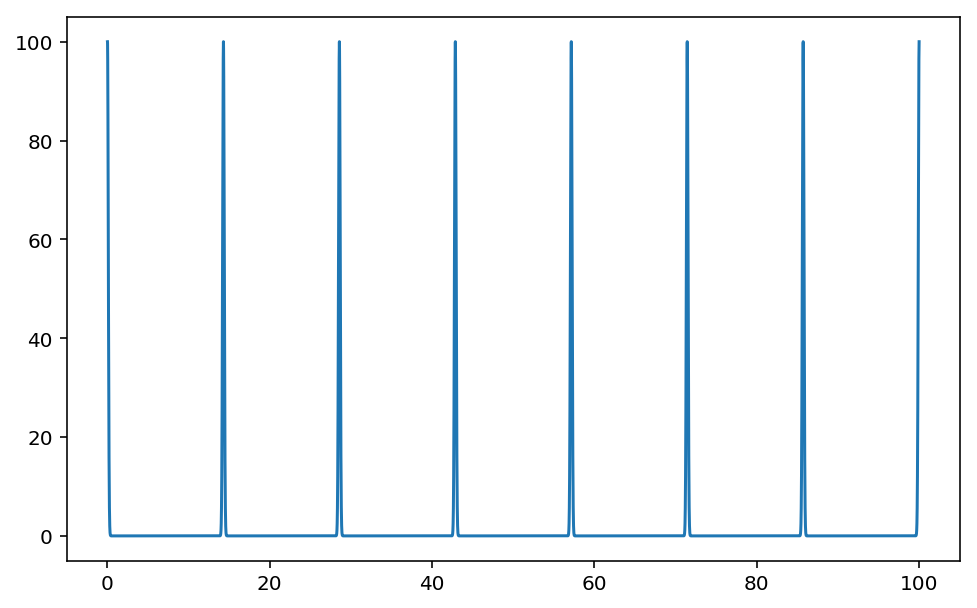

In [95]:
delayRange = 100
numPulses = int(np.floor(delayRange/12.5))
print(numPulses)
pulseInRange = np.floor(delayRange/12.5)*12.5
pulses = np.linspace(0,pulseInRange,numPulses)
print(pulses)

numt = delayRange*10000+1 # number of time elements (resolution 100fs if *10000)
tlist = np.linspace (0, delayRange, numt) #array of time (in ns)
taulist = tlist

#make driving pulsetrain: fs laser, each laser pulse is Gaussian with width 200fs
laserPulsetrain = np.zeros(numt)
#laserPW = 2E-4
laserPW = 0.1
pulseAmplitude = 100 # height of laser pulse
for i in range(numPulses):
    thisPulse = pulseAmplitude * np.exp(-(tlist - pulses[i]) ** 2 / (2 * laserPW ** 2))
    laserPulsetrain = laserPulsetrain+thisPulse

fig0, ax0 = plt.subplots(figsize=(8,5))
ax0.plot(tlist,laserPulsetrain)    

In [96]:
# Quantum Mechanics part
gamma = 0.1 # decay parameter in 1/ns
# initial state
psi0_2photon = fock(2, 0) # two-photon ground state
# operators
sm = destroy(2) # atomic lowering operator
n = sm.dag()*sm # number operator
# Hamiltonian
H_I_2photon = sm + sm.dag()
H_2photon = [[H_I_2photon, laserPulsetrain]]
# collapse operator that describes dissipation
c_ops = [np.sqrt(gamma) * sm] # represents spontaneous emission

In [93]:
n_2photon = mesolve(H_2photon, psi0_2photon, tlist, c_ops, n).expect[0]

0.9989076719647108


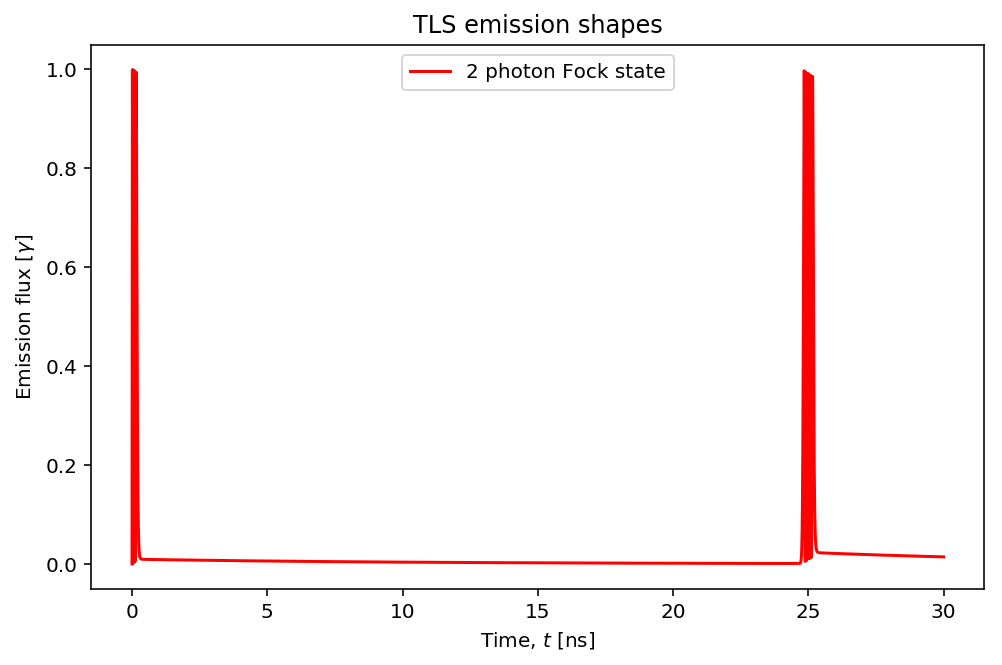

In [94]:
fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(tlist, n_2photon, 'r', label="2 photon Fock state")
ax1.legend()
ax1.set_xlabel('Time, $t$ [ns]')
ax1.set_ylabel('Emission flux [$\gamma$]')
ax1.set_title('TLS emission shapes');
print(np.max(n_2photon))